# Your first fit

In [1]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.8.5


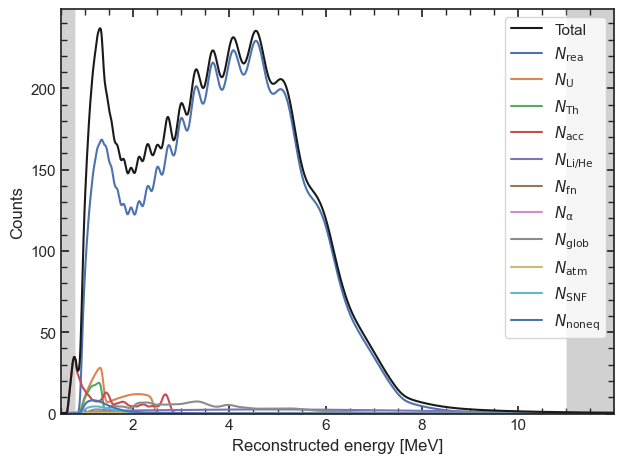

In [2]:
model = orsa.model.read_json('inputs/test_model.json')
model.exposure = 6*365.25
model

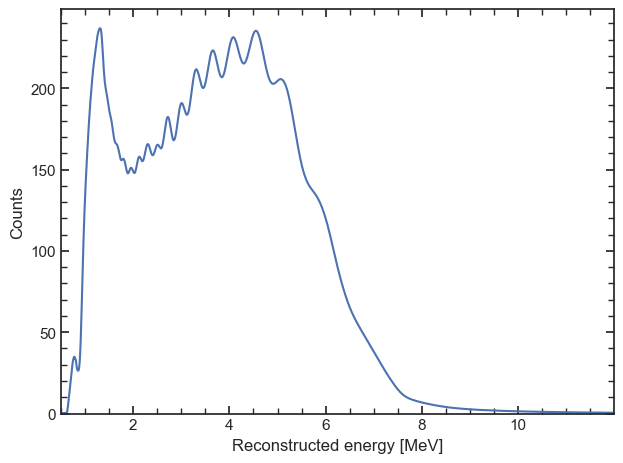

In [4]:
data = model.get_spectrum(asimov = False)
data

In [5]:
init_model = model.copy()
model.use_shape_uncertainty = False
cf = orsa.probability.CostFunction(ll=orsa.probability.ll_binned, model=model, data=data, ll_args = dict())
true_values = cf.get_params_to_fit()[0]
res = orsa.fit.minuit(cf)
res.true_values = true_values

Cost function parsed as LogLikelihood-like


In [6]:
res.obj

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5976                       │              Nfcn = 826              │
│ EDM = 3.73e-16 (Goal: 0.0002)    │           time = 21.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ eff:    │   1.000   │   0.009   │            │            │         │         │       │
│ 1 │ a:      │ 26.14e-3  │  0.20e-3  │            │            │         │         │       │
│ 2 │ b:      │  6.40e-3  │  0.08e-3  │            │            │         │         │       │
│ 3 │ c:      │  12.1e-3  │  0.4e-3   │            │            │         │         │       │
│ 4 │ a0:     │     0     │     1     │            │            │         │         │       │
│ 5 │ a1:     │     0     │     1     │            │            │         │         │       │
│ 6 │ a2:     │     0     │     1     │            │            │         │         │       │
│ 7 │ a3:     │     0     │     1     │            │            │         │         │       │
│ 8 │ rho:    │   2.45    │   0.15    │            │            │         │         │       │
│ 9 │ dm2_21: │ 75.30e-6  │  0.26e-6  │            │            │         │         │       │
│ 10│ dm2_31: │ 2.528e-3  │ 0.004e-3  │            │            │         │         │       │
│ 11│ s2_12:  │  0.3070   │  0.0018   │            │            │         │         │       │
│ 12│ s2_13:  │  0.0218   │  0.0024   │            │            │         │         │       │
│ 13│ YJ-C1:  │   1.000   │   0.008   │            │            │         │         │       │
│ 14│ YJ-C2:  │   1.000   │   0.008   │            │            │         │         │       │
│ 15│ YJ-C3:  │   1.000   │   0.008   │            │            │         │         │       │
│ 16│ YJ-C4:  │   1.000   │   0.008   │            │            │         │         │       │
│ 17│ YJ-C5:  │   1.000   │   0.008   │            │            │         │         │       │
│ 18│ YJ-C6:  │   1.000   │   0.008   │            │            │         │         │       │
│ 19│ TS-C1:  │   1.000   │   0.008   │            │            │         │         │       │
│ 20│ TS-C2:  │   1.000   │   0.008   │            │            │         │         │       │
│ 21│ DYB-C:  │   1.000   │   0.008   │            │            │         │         │       │
│ 22│ rea:    │  289.5e3  │   3.3e3   │            │            │         │         │       │
│ 23│ U:      │   2.0e3   │   0.5e3   │            │            │         │         │       │
│ 24│ Th:     │  0.66e3   │  0.20e3   │            │            │         │         │       │
│ 25│ acc:    │  1.753e3  │  0.017e3  │            │            │         │         │       │
│ 26│ lihe:   │  1.75e3   │  0.20e3   │            │            │         │         │       │
│ 27│ fn:     │  0.22e3   │  0.14e3   │            │            │         │         │       │
│ 28│ alpha:  │    110    │    50     │            │            │         │         │       │
│ 29│ glob:   │  2.19e3   │  0.04e3   │            │            │         │     

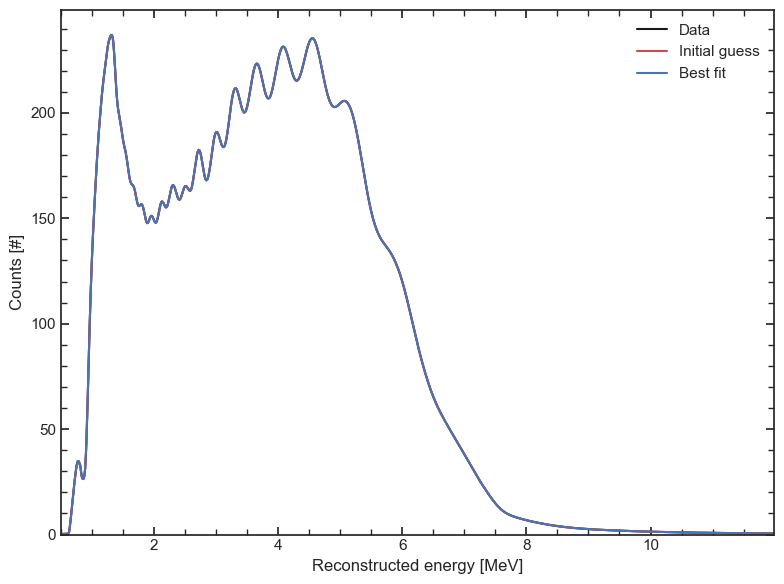

In [7]:
fig, ax = plt.subplots(figsize = (8,6))
sp_initial = init_model.get_spectrum(asimov=True)
sp_final = model.get_spectrum(asimov=True)

ax.plot(data.E, data.counts, 'k-', label = 'Data')
ax.plot(sp_initial.E, sp_initial.counts, 'r-', label = 'Initial guess')
ax.plot(sp_final.E, sp_final.counts, 'b-', label = 'Best fit')
ax.set_xlim(model.E_eval.min(), model.E_eval.max())
ax.set_ylim(bottom = False)
ax.set_xlabel('Reconstructed energy [MeV]')
ax.set_ylabel('Counts [#]')

ax.legend(frameon = False)
fig.tight_layout()

(0.0, 280.0)

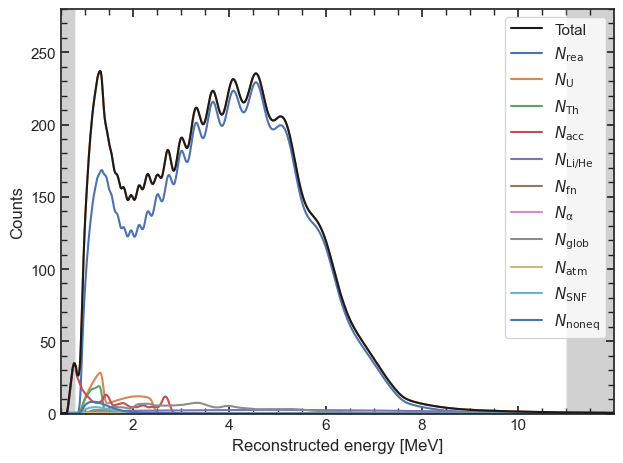

In [8]:
fig, ax = model.get_fig()
ax.plot(data.E, data.counts, zorder = -10)
ax.set_ylim(top = 280)

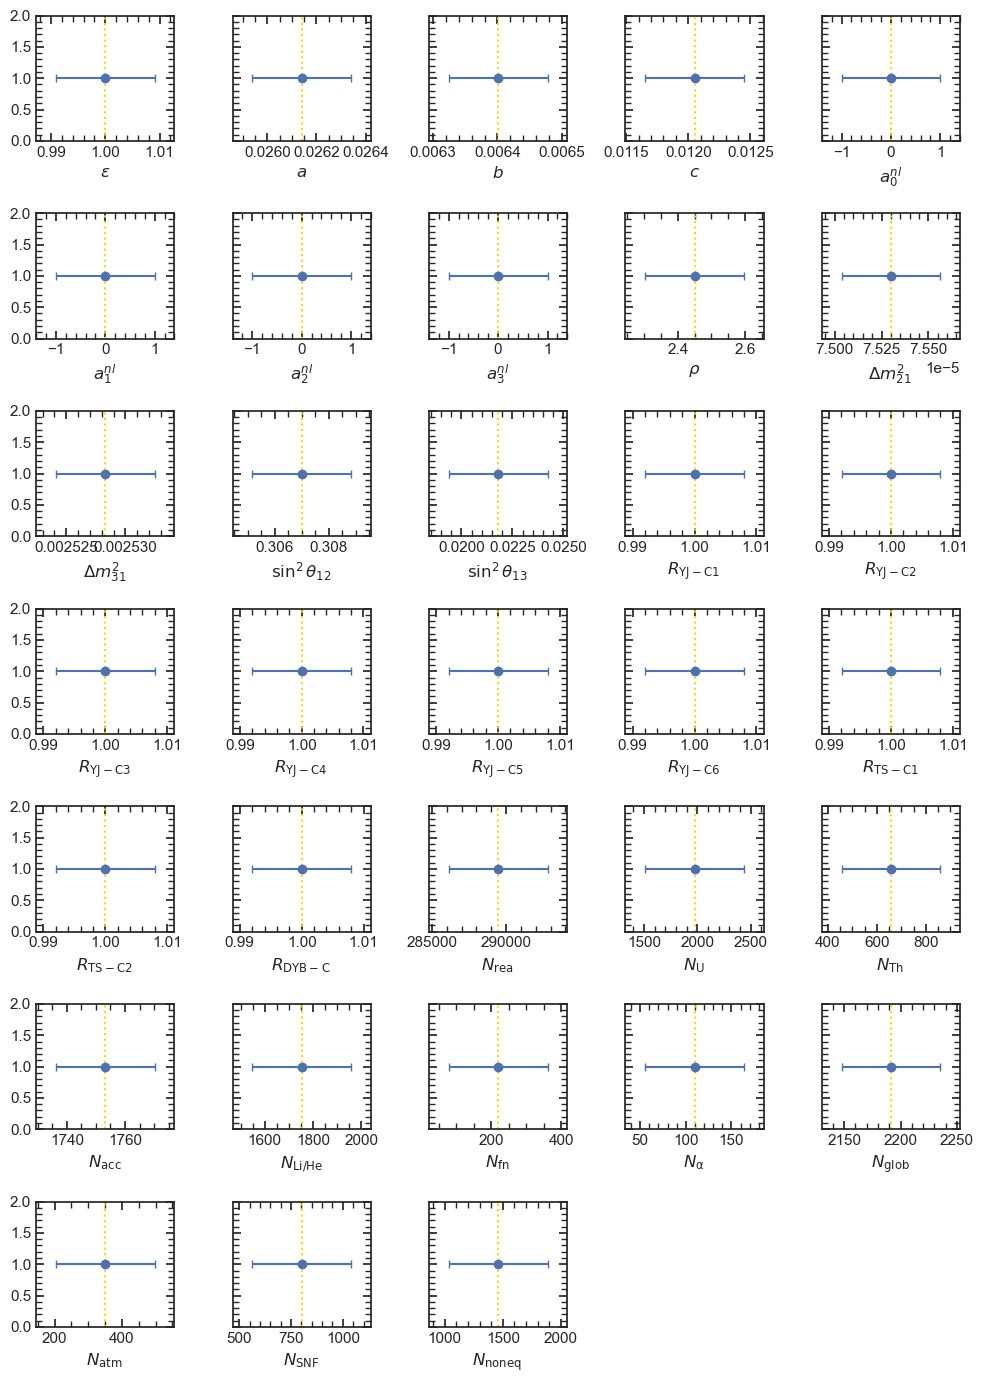

In [9]:
orsa.plot.bars(res, true_values=True);